# Dataset: Sarcasm

## 1. Import libraries and dataset

In [ ]:
import json 
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

## Set the constants

In [ ]:
vocab_size = 10000
embedding_dimension = 16
max_length = 100
num_epochs = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O tmp/sarcasm.json

--2020-10-24 02:30:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘tmp/sarcasm.json’

tmp/sarcasm.json    100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2020-10-24 02:30:05 (55.3 MB/s) - ‘tmp/sarcasm.json’ saved [5643545/5643545]



## Read the dataset

In [ ]:
with open('./tmp/sarcasm.json', 'r') as f: 
  datastore = json.load(f)

sentences = []
labels = []


for item in datastore: 
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

import numpy as np
labels = np.array(labels)

## 2. Preprocess the data

In [ ]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [ ]:
len(training_labels)

20000

### Preprocess the data with tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)

test_padded = pad_sequences(test_sequences)

In [ ]:
training_padded.shape

(20000, 100)

In [ ]:
test_padded.shape

(6709, 38)

## 3. Create the model

In [ ]:
model = Sequential([
  Embedding(vocab_size, embedding_dimension, input_length=max_length),
  GlobalAveragePooling1D(), 
  Dense(24, activation='relu'), 
  Dense(1, activation='sigmoid')                   
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
!rm -rf ./logs/ 

## 4. Train the model

In [ ]:
history = model.fit(training_padded, 
          training_labels, 
          epochs = num_epochs, 
          validation_data=(test_padded, testing_labels) 
          )

Epoch 1/30
625/625 [==============================] - 3s 4ms/step - loss: 0.6785 - acc: 0.5638 - val_loss: 0.5939 - val_acc: 0.7561
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.4778 - acc: 0.8019 - val_loss: 0.4130 - val_acc: 0.8334
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3249 - acc: 0.8669 - val_loss: 0.4522 - val_acc: 0.8477
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 0.2710 - acc: 0.8941 - val_loss: 0.4684 - val_acc: 0.8557
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2351 - acc: 0.9083 - val_loss: 0.4903 - val_acc: 0.8560
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2072 - acc: 0.9202 - val_loss: 0.5292 - val_acc: 0.8559
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1846 - acc: 0.9298 - val_loss: 0.5600 - val_acc: 0.8547
Epoch 8/30
625/625 [==============================] - 3s 4ms/step - loss: 0.

In [ ]:
# Print the accuracy
_, acc = model.evaluate(test_padded, testing_labels, verbose=0)
print('Accuracry: {}'.format(acc * 100.0))

Accuracry: 81.62170052528381


## 5. Plot the results

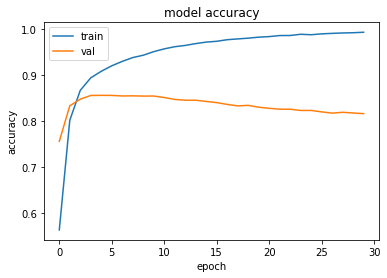

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

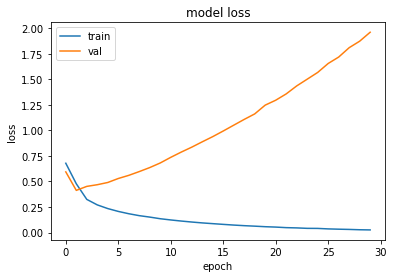

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 6. Do the prediction

In [ ]:
test_sen = ['Everyone seems normal until you get to know them.']

test_sen_sequences = tokenizer.texts_to_sequences(test_sen)

padded_test_sen_sequences = pad_sequences(test_sen_sequences, 
                                          maxlen=max_length, 
                                          padding=padding_type, 
                                          truncating=trunc_type)

model.predict(padded_test_sen_sequences)

array([[0.99971515]], dtype=float32)